In [8]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

[0.625357914301502, 0.6308617234468938]

In [12]:
for d in ['webkb', '20ng',  'reut', 'acm']:
    with open(f'{d}_w=5_nh=4_lr=0.00100_l2=0.00100_bs=16.json') as filin:
        obj_json = json.load(filin)
    print(d)
    for fold in obj_json['folds']:
        f1_mi = f1_score( fold['y_test'], fold['y_pred'], average='micro' )
        f1_ma = f1_score( fold['y_test'], fold['y_pred'], average='macro' )
        print( f"{f1_mi:.4f}\t{f1_ma:.4f}" )

webkb
0.7947	0.7584
0.8114	0.7224
0.8246	0.7173
0.8210	0.7096
0.7978	0.7063
0.7768	0.6322
0.8132	0.7110
0.7946	0.7364
0.8042	0.7321
0.7931	0.7157
20ng
0.8044	0.7943
0.7694	0.7575
0.7915	0.7789
0.7802	0.7654
0.7916	0.7747
0.7998	0.7880
0.7991	0.7885
0.7888	0.7769
reut
0.7378	0.4383
0.7360	0.3211
0.7363	0.3945
0.7336	0.3010
0.7380	0.3575
0.7504	0.3562
0.7740	0.4827
0.7612	0.3570
0.7479	0.3818
0.7579	0.4290
acm
0.6990	0.5629
0.6949	0.5627
0.7072	0.5534
0.7045	0.5441
0.7048	0.5734
0.6973	0.6067
0.6982	0.5751
0.7129	0.5504
0.7023	0.5448
0.7087	0.5831


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [24]:
data = []
for f,fold in enumerate(obj_json['folds']):
    for i, (train, val) in enumerate(fold['epochs_acc']):
        data.append( (f, i, train,val ) )

In [29]:
df = pd.DataFrame( data, columns=['fold', 'epoch', 'train', 'val'] )

In [28]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

Text(0, 0.5, 'Acurácia')

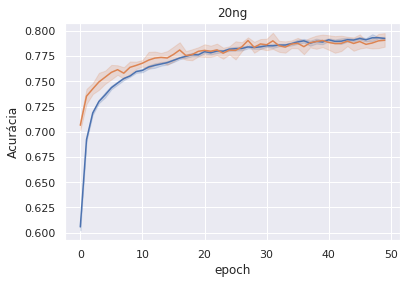

In [43]:
dname='20ng'
with open(f'{dname}_w=5_nh=4_lr=0.00100_l2=0.00100_bs=16.json') as filin:
    obj_json = json.load(filin)
data = []
for f,fold in enumerate(obj_json['folds']):
    for i, (train, val) in enumerate(fold['epochs_acc']):
        data.append( (f, i, train,val ) )
df = pd.DataFrame( data, columns=['fold', 'epoch', 'train', 'val'] )
sns.lineplot(x="epoch", y="train", data=df)
ax = sns.lineplot(x="epoch", y="val", data=df).set_title(dname)
plt.ylabel("Acurácia")